# Task 2: predict language in a document.


In [1]:
# Python 3.6

import os
import glob
from collections import Counter

import nltk

from src.data_loading.task_2 import load_train, load_test
from src.text_classifier_pipelines.char_ngram.logistic import find_and_train_best_logistic_pipeline
from src.text_classifier_pipelines.char_ngram.multinomial_naive_bayes import find_and_train_best_multinomial_pipeline
from src.evaluation.eval_and_plot import eval_and_plot

## First: load data.

In [2]:
corpus_train = glob.glob(os.path.join(".", "data", "task2", "identification_langue", "corpus_entrainement", "*.txt"))
corpus_test1 = glob.glob(os.path.join(".", "data", "task2", "identification_langue", "corpus_test1", "*.txt"))

print("Train files found:", corpus_train)
print("")
print("Test files found:", corpus_test1)
print("")

X_train, y_train, labels_readable = load_train(corpus_train, sentence_tokenizer=nltk.sent_tokenize)
X_test, y_test = load_test(corpus_test1, labels_readable)

print("'print(len(X_train), len(y_train))':")
print(len(X_train), len(y_train))
print("'print(len(X_test), len(y_test))':")
print(len(X_test), len(y_test))
print("")
print("Do we have a balanced dataset after counting sentences in train, and items in test?")
print("    Train:", Counter(y_train))
print("    Test:", Counter(y_test))
print("Note: Indices are labels' indexes, and counts are their appearance. Labels are:")
print(list(enumerate(labels_readable)))
print("")

Train files found: ['./data/task2/identification_langue/corpus_entrainement/espanol-training.txt', './data/task2/identification_langue/corpus_entrainement/portuguese-training.txt', './data/task2/identification_langue/corpus_entrainement/french-training.txt', './data/task2/identification_langue/corpus_entrainement/english-training.txt']

Test files found: ['./data/task2/identification_langue/corpus_test1/test15-es.txt', './data/task2/identification_langue/corpus_test1/test26-pt.txt', './data/task2/identification_langue/corpus_test1/test39-es.txt', './data/task2/identification_langue/corpus_test1/test3-fr.txt', './data/task2/identification_langue/corpus_test1/test28-pt.txt', './data/task2/identification_langue/corpus_test1/test40-es.txt', './data/task2/identification_langue/corpus_test1/test12-fr.txt', './data/task2/identification_langue/corpus_test1/test20-fr.txt', './data/task2/identification_langue/corpus_test1/test24-pt.txt', './data/task2/identification_langue/corpus_test1/test35-en

## Then, create Pipeline() classes for scikit-learn

Because here, we want to perform those steps in order: 
1. Lowercase the text (but keep accents).
2. Convert the documents to char ngrams.
3. Use the classifier of our choice later on.

This is done in the `from src.text_classifier_pipelines` local package imported.

## Training First Pipeline: TF-IDF Logistic Classifier.

Cross Validation is performed.

In [3]:
best_trained_logistic_pipelines = find_and_train_best_logistic_pipeline(X_train, y_train)

Will start Cross Validation for Logistic Classifiers.

Cross-Validation Grid Search for: '1-gram'...
Best hyperparameters for '1-gram' (4-folds cross validation accuracy score=0.924380704041721):
{'count_vectorizer__lowercase': False, 'count_vectorizer__max_df': 0.98, 'count_vectorizer__max_features': 100000, 'count_vectorizer__min_df': 1, 'count_vectorizer__ngram_range': (1, 1), 'count_vectorizer__preprocessor': None, 'count_vectorizer__strip_accents': None, 'count_vectorizer__tokenizer': <function identity at 0x7f4226572a60>, 'logistic_regression__C': 1000.0, 'tf_idf__norm': 'l1', 'tf_idf__smooth_idf': True, 'tf_idf__sublinear_tf': False, 'to_ngram__ngram': 1, 'to_ngram__stride': 1}

Cross-Validation Grid Search for: '2-gram'...
Best hyperparameters for '2-gram' (4-folds cross validation accuracy score=0.9934810951760105):
{'count_vectorizer__lowercase': False, 'count_vectorizer__max_df': 0.98, 'count_vectorizer__max_features': 100000, 'count_vectorizer__min_df': 1, 'count_vectorizer

## Training Second Pipeline: TF-IDF Multinomial Naive Bayes Classifier.

Cross Validation is performed.

In [4]:
best_trained_bayes_pipelines = find_and_train_best_multinomial_pipeline(X_train, y_train)

Will start Cross Validation for Naive Bayes (MultinomialNB) Classifiers.

Cross-Validation Grid Search for: '1-gram'...
Best hyperparameters for '1-gram' (4-folds cross validation accuracy score=0.9269882659713168):
{'count_vectorizer__lowercase': False, 'count_vectorizer__max_df': 0.98, 'count_vectorizer__max_features': 100000, 'count_vectorizer__min_df': 1, 'count_vectorizer__ngram_range': (1, 1), 'count_vectorizer__preprocessor': None, 'count_vectorizer__strip_accents': None, 'count_vectorizer__tokenizer': <function identity at 0x7f4226572a60>, 'naive_bayes_multiclass__alpha': 0.01, 'tf_idf__norm': None, 'tf_idf__smooth_idf': True, 'tf_idf__sublinear_tf': False, 'to_ngram__ngram': 1, 'to_ngram__stride': 1}

Cross-Validation Grid Search for: '2-gram'...
Best hyperparameters for '2-gram' (4-folds cross validation accuracy score=0.9869621903520208):
{'count_vectorizer__lowercase': False, 'count_vectorizer__max_df': 0.98, 'count_vectorizer__max_features': 100000, 'count_vectorizer__min_

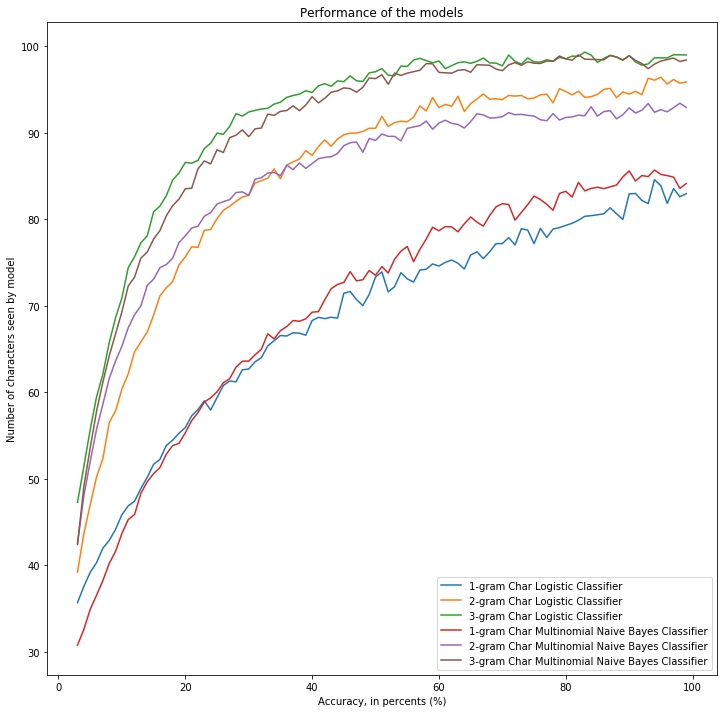

In [5]:
plot_range = 100

best_trained_pipelines = dict()
best_trained_pipelines.update(best_trained_logistic_pipelines)
best_trained_pipelines.update(best_trained_bayes_pipelines)

# eval_and_plot(best_trained_logistic_pipelines, X_test, y_test, plot_range=plot_range)
# eval_and_plot(best_trained_bayes_pipelines, X_test, y_test, plot_range=plot_range)
eval_and_plot(best_trained_pipelines, X_test, y_test, plot_range=plot_range)

print("")

In [6]:
print("The final test: classifying on test documents of full-length:")
print("")
max_score = 0
max_score_model = ""
for (model_name, model) in best_trained_pipelines.items():
    score = model.score(X_test, y_test) * 100
    if score > max_score: 
        max_score = score
        max_score_model = model_name
    print("Test set score for '{}': {}%".format(model_name, score))
print("")
print("Max score is by '{}': {}%".format(max_score_model, max_score))
print("")

The final test: classifying on test documents of full-length:

Test set score for '1-gram Char Logistic Classifier': 100.0%
Test set score for '2-gram Char Logistic Classifier': 100.0%
Test set score for '3-gram Char Logistic Classifier': 100.0%
Test set score for '1-gram Char Multinomial Naive Bayes Classifier': 95.0%
Test set score for '2-gram Char Multinomial Naive Bayes Classifier': 100.0%
Test set score for '3-gram Char Multinomial Naive Bayes Classifier': 100.0%

Max score is by '1-gram Char Logistic Classifier': 100.0%

